In [1]:
import IPython

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
RANDOM_STATE = 2020

In [4]:
from mpl_toolkits.basemap import Basemap

# Intro
### Why this project? How is the solution valuable?
This project is about customer demographics prediction. Customer demographics profile has many applications. It can identify key characteristics of the customer, so that we can refine marketing strategy and increase engagement.
A more tangible example of such application can be found in recommendation system. For instance, a brief EDA indicates that users in 32-40 and 44+ age group are more active than users in younger age group. Note that users in different age group would have different interests in, say, news and/or music. So, based on the demographics prediction, as well as the demographics behavior and interests profiles. A recommendation system can provide semi-customized (‘semi-customized’ meaning based on group segmentation profiles) information at ‘right’ time for ‘right’ people.

### What is the task? 
In this project, we are trying to predict customer demogrphics profiles, namely, gender and age, using data captured from cellphone. To be more specific, suppose we have data that tells us the brand and model a customer uses, at what time (timestamp) and where (GPS coordinates) the customer uses his/her phone, and what apps the customer is using, plus the label/categories those apps belong to. Would you be able to figure out the gender and age of the customer(s)?

### About the dataset
The dataset includes 7 relevant data frames in a **relational** fashion, and 6 of them will be used in this project, namely gender_age_train (later I will name this one 'df_target'), phone_brand_device_model (i.e. df_phone_device), events (i.e. df_event), app_events (i.e., df_app_event), app_labels (i.e., df_app_label) and label_categories (i.e. df_label_categories). 
From the following drawing, we can have a clear view of relational dataset and the primary keys (pk) and foreign keys (fk) that connect each other. This **interactive** relational dataset drawing is created by using [dbdiagram.io](https://dbdiagram.io/home). In this [link](https://dbdiagram.io/embed/5f10914074ca2227330d7306), you can find more information about the dataset architecture. e.g. gender_age_train.device_id is 'one-to-one' connect with phone_brand_device_model.device_id, while events.event_id is 'one-to-many' connect with app_events.event_id.
<img src="https://github.com/kefeimo/Thinkful_DataScience/raw/master/module38%20final%20capstone/res/thinkful%20talking%20data.png">

Note: since the we don't have access to the real demographics in the test dataset, for demonstration purpose, we will not include it in this project.

### The roadmap: What to see.
I will present the projects in three main parts:
- EDA and modeling prep
- Machine learning core skills (supervised learning)
- Unsupervised learning
- Discussion and future work

#### PART I: EDA and model prep
The pipeline of this project is very interative and sometimes can be tedious. I will try to present the procedure in a clearer way. But note that the actual process is much more complex than it is shown here.
Since this is a relational dataset, there are more than one way of modeling to feed as input to the machine learning algorithm. e.g. we are either working on a single tabular dataset (i.e. crosstable) or a datastructure that certain deep learning algorithm can understand. Also the note that the size of the dataset can explode during the merge process if not paying attention.
So, Besides the common routine for data cleaning (e.g. fillna) I will demonstrate several data wrangling techniques (e.g. pd.merge, df.astype).
For the EDA part, the emphasize is data story telling with interactive visualization.

#### PART II: ...

# Feel free to jump to Actual EDA if you think the data wrangling part is too boring

In [5]:
# display the relational dataset drawing (interactive plot)
url = 'https://dbdiagram.io/embed/5f10914074ca2227330d7306'
IPython.display.IFrame(url, width=1200, height=415)

# EDA
content table

- preview (col name, col type, num_row, nunique, missing)

In [6]:
# a customer function that to review the info that we care
def df_review(df):
    print(df.head())
    print('==============================================')
    print(df.info())
    print('==============================================')
    print('nunique:')
    for col in df.columns:
        print('{:10s}: {}'.format(col, df[col].nunique()))
    print('==============================================')
    print('missing:')
    for col in df.columns:
        print('{:10s}: {}'.format(col, df[col].isna().sum()))
    

In [7]:
# load the 6 dataframes to work on
df_target_train = pd.read_csv('./talkingdata-mobile-user-demographics/gender_age_train.csv')
df_phone_brand_device_model = pd.read_csv('./talkingdata-mobile-user-demographics/phone_brand_device_model.csv')
df_events = pd.read_csv('./talkingdata-mobile-user-demographics/events.csv')
df_app_events_original = pd.read_csv('./talkingdata-mobile-user-demographics/app_events.csv')
df_app_labels = pd.read_csv('./talkingdata-mobile-user-demographics/app_labels.csv')
df_label_categories = pd.read_csv('./talkingdata-mobile-user-demographics/label_categories.csv')

In [8]:
df_review(df_target_train)

             device_id gender  age   group
0 -8076087639492063270      M   35  M32-38
1 -2897161552818060146      M   35  M32-38
2 -8260683887967679142      M   35  M32-38
3 -4938849341048082022      M   30  M29-31
4   245133531816851882      M   30  M29-31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB
None
nunique:
device_id : 74645
gender    : 2
age       : 85
group     : 12
missing:
device_id : 0
gender    : 0
age       : 0
group     : 0


In [9]:
df_review(df_phone_brand_device_model)

             device_id phone_brand   device_model
0 -8890648629457979026          小米             红米
1  1277779817574759137          小米           MI 2
2  5137427614288105724          三星      Galaxy S4
3  3669464369358936369       SUGAR           时尚手机
4 -5019277647504317457          三星  Galaxy Note 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187245 entries, 0 to 187244
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   device_id     187245 non-null  int64 
 1   phone_brand   187245 non-null  object
 2   device_model  187245 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.3+ MB
None
nunique:
device_id : 186716
phone_brand: 131
device_model: 1599
missing:
device_id : 0
phone_brand: 0
device_model: 0


In [10]:
# check if deice_id is one-to-one to phone_brand and device_model, (also it is a way to check duplicate)
# the answer is Yes
print(df_phone_brand_device_model.groupby('device_id').phone_brand.value_counts())
print(df_phone_brand_device_model.groupby('device_id').device_model.value_counts())

device_id             phone_brand
-9223321966609553846  小米             1
-9223067244542181226  vivo           1
-9223042152723782980  小米             1
-9222956879900151005  三星             1
-9222896629442493034  OPPO           1
                                    ..
 9222539910510672930  华为             1
 9222779211060772275  小米             1
 9222784289318287993  华为             1
 9222849349208140841  小米             1
 9223069070668353002  三星             1
Name: phone_brand, Length: 186720, dtype: int64
device_id             device_model 
-9223321966609553846  红米note           1
-9223067244542181226  Y19T             1
-9223042152723782980  MI 3             1
-9222956879900151005  Galaxy Note 2    1
-9222896629442493034  A31              1
                                      ..
 9222539910510672930  Ascend P7        1
 9222779211060772275  MI 4             1
 9222784289318287993  G520-5000        1
 9222849349208140841  MI 4             1
 9223069070668353002  Galaxy S4        1
Na

In [11]:
df_review(df_events)

   event_id            device_id            timestamp  longitude  latitude
0         1    29182687948017175  2016-05-01 00:55:25     121.38     31.24
1         2 -6401643145415154744  2016-05-01 00:54:12     103.65     30.97
2         3 -4833982096941402721  2016-05-01 00:08:05     106.60     29.70
3         4 -6815121365017318426  2016-05-01 00:06:40     104.27     23.28
4         5 -5373797595892518570  2016-05-01 00:07:18     115.88     28.66
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  int64  
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 124.1+ MB
None
nunique:
event_id  : 3252950
device_id : 60865
timestamp : 588125
longitude : 3588
latitude  : 3086
missing:
event_id  : 0
device_id : 0
timestamp : 0
longitude : 0
latitude  : 0


In [12]:
df_review(df_app_events_original)

   event_id               app_id  is_installed  is_active
0         2  5927333115845830913             1          1
1         2 -5720078949152207372             1          0
2         2 -1633887856876571208             1          0
3         2  -653184325010919369             1          1
4         2  8693964245073640147             1          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32473067 entries, 0 to 32473066
Data columns (total 4 columns):
 #   Column        Dtype
---  ------        -----
 0   event_id      int64
 1   app_id        int64
 2   is_installed  int64
 3   is_active     int64
dtypes: int64(4)
memory usage: 991.0 MB
None
nunique:
event_id  : 1488096
app_id    : 19237
is_installed: 1
is_active : 2
missing:
event_id  : 0
app_id    : 0
is_installed: 0
is_active : 0


In [13]:
df_review(df_app_labels)

                app_id  label_id
0  7324884708820027918       251
1 -4494216993218550286       251
2  6058196446775239644       406
3  6058196446775239644       407
4  8694625920731541625       406
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459943 entries, 0 to 459942
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   app_id    459943 non-null  int64
 1   label_id  459943 non-null  int64
dtypes: int64(2)
memory usage: 7.0 MB
None
nunique:
app_id    : 113211
label_id  : 507
missing:
app_id    : 0
label_id  : 0


In [14]:
df_review(df_label_categories)

   label_id           category
0         1                NaN
1         2     game-game type
2         3   game-Game themes
3         4     game-Art Style
4         5  game-Leisure time
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label_id  930 non-null    int64 
 1   category  927 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.7+ KB
None
nunique:
label_id  : 930
category  : 835
missing:
label_id  : 0
category  : 3


In [15]:
# check if the label_id associated with the null values appear anywhere else (e.g., in df_app_labels)
# the answer is no
print(df_label_categories[df_label_categories.category.isna()])
print()
print('if the label_id associated with the null values appear anywhere else (e.g., in df_app_labels)?')
df_app_labels.label_id.isin(df_label_categories[df_label_categories.category.isna().values].label_id).any()

     label_id category
0           1      NaN
229       248      NaN
245       264      NaN

if the label_id associated with the null values appear anywhere else (e.g., in df_app_labels)?


False

#  intermediate summary of preview
Since we have 6 dataframes to work on, the EDA can be a bit over whelming. Let's highligth some discorveries.
### Data type
Most of the variables are in object datatype. (Which personally I hate to work with. ;(
- The data type is indicated by the .info() function. While XX_id (e.g. device_id, event_id, label_id, etc.) variables is in int64 format, they should be considered as categorical data instead.
- The is_installed and is_active are bool type in disguise.
- The timestamp is datetime in disguise.
### dataframe size
Number of columns and rows are indicated by the .info() function. 
- None of the dataframes have many columns (low dimenssionality; but this situation will change after we start to deal with those categorical data)
- The dataframe has most rows is df_app_events, also it has the largest size. This is expecting, since there is no primary key in this dataset, the relatioinship between event_id and app_id is many-to-many, thus the nested structure make the dataframe very big.
### nunique
number of unique values is indicated by using .nunique() function. This piece of information is extrmemly important to determine how to restucture the relational dataset.
- First of all, we found a usless variable, is_installed in df_app_event. Since it has nothing but value 1, it would not provide any information for us. Drop it with no mercy.
- While the device_id is the pk (primary key) in df_target_train, df_phone_brand_device_model, and the relationship is one-to-one, but the unique values in the dataframes are different respectively. Note that the nunique values of device_id in df_target_train, df_phone_brand_device_model, and df_events are 74645, 187,245 and 60,865. Which means not all the device_id have associated event information (which indicates user behaviors). Actually we will found out later that the device_id appear in both df_target_train and df_events is around 22k; this would be the users we will focus on. Otherwise we will merely rely on phone brand and model to predict user demographics. (That's like magic if only rely on phone device information that we can predict user demographics.)
- There is more to say when using nunique, which I will cover later.
### missing values
- Only 'category' within df_label_categories. After checking if the label_id associated with the null values appear anywhere else (e.g., in df_app_labels), the answer is NO. So, we can simply drop the null rows.
- But don't release yourself and think that we have sucessfully handel all the null values. It is not surprising that relatioinal dataset doesn't have a lot null values. Recall that we have found out many device_id do not have associated event record; this is missing information indeed, while NAN didn't appear. Later on, we will also find that there is no assocaited label_id associated: missing value again. Otherwise how should we interprete it? A phone with no app installed? Nah.
### Some other things 
- One thing that specific to this dataset is in df_phone_brand_device_model the brand and model names are in Chinese. This is a bit annoying and might cause trouble for many packages that cannot process uni-code. So we should deal with that. I used 'googletrans' to parse uni-code in Chinese to ASCII. Without going into detail, I would not demonstrate it here. Also Google Translate has ceratain limit when using this API, Google would block your IP if using this API too frequent.
- Utilize groupby. It is also very important to double check if our understanding of the relational dataset is correct, e.g. if device_id is the pk in df_phone_brand_device_model, then individual deivce_id should have only one associated model and brand.
- As mentioned ealier when we talking about missing values, there are might be missing information even though there is no sigal like 'NAN'. More specifically, we should ckeck the connected key (e.g. XX_id) to see if they apear in both dataframes being connected.
- Since there 12 lables for the 'group' target, which is a combination of gender and age_group. Maybe we can predict this target in two steps, first predict gender and age_group, then combine them. (though there some mismatch, e.g. M22- and F23-, let's just ignore the missmatch for now)
### Next step
- Add a modified target column 'age_cate', ['A22-', 'A23-26', 'A27-28', 'A29-31', 'A32-40', 'A40+']
- parse device brand and model to ASCII
- Let's get the XX_id appear in the dataframe on either side, and update the relational dataset drawing
- Merge some of the datafram and do EDA


In [16]:
# create a new target column

In [17]:
df_age_cate_link = pd.DataFrame({'group':np.sort(df_target_train.group.unique())})
df_age_cate_link['age_cate'] = ['A22-', 'A23-26', 'A27-28', 'A29-31', 'A32-40', 'A40+'] * 2
df_age_cate_link

# df_age_cate_link

,group,age_cate
0,F23-,A22-
1,F24-26,A23-26
2,F27-28,A27-28
3,F29-32,A29-31
4,F33-42,A32-40
5,F43+,A40+
6,M22-,A22-
7,M23-26,A23-26
8,M27-28,A27-28
9,M29-31,A29-31


In [18]:
df_target_train_newgrp = pd.merge(left=df_target_train,
                                       right=df_age_cate_link,
                                       how='inner',
                                       on='group')
df_target_train_newgrp.head()

,device_id,gender,age,group,age_cate
0,-8076087639492063270,M,35,M32-38,A32-40
1,-2897161552818060146,M,35,M32-38,A32-40
2,-8260683887967679142,M,35,M32-38,A32-40
3,236877999787307864,M,36,M32-38,A32-40
4,-8098239495777311881,M,38,M32-38,A32-40


In [19]:
# parse the phone device to english

# problem:
# exist names in Chinese (hard to display)
# very sparse data (too many brands and models)

# solution:
# change chinese into english
# trim the number of phone devices.

# I have done it for you

In [20]:
df_brand = pd.read_csv('./talkingdata-mobile-user-demographics/brand_parse.csv')
df_model = pd.read_csv('./talkingdata-mobile-user-demographics/model_parse.csv')

# merge to the original device
# note that df_phone_brand_device_model exist duplicate iterms
df_phone_brand_device_model_parse = df_phone_brand_device_model.groupby('device_id').first().reset_index()
# df_parse

df_phone_brand_device_model_parse = pd.merge( left=df_phone_brand_device_model_parse,
                   right=df_brand,
                   how = 'left',
                   left_on='phone_brand', right_on='brand_original')
df_phone_brand_device_model_parse = pd.merge( left=df_phone_brand_device_model_parse,
                   right=df_model,
                   how = 'left',
                   left_on='device_model', right_on='model_original')

df_phone_brand_device_model_parse = df_phone_brand_device_model_parse.drop(['brand_original', 'model_original'], axis=1)

df_phone_brand_device_model_parse.head()

,device_id,phone_brand,device_model,brand_parse,model_parse
0,-9223321966609553846,小米,红米note,Xiaomi,Red rice note
1,-9223067244542181226,vivo,Y19T,vivo,Y19T
2,-9223042152723782980,小米,MI 3,Xiaomi,MI 3
3,-9222956879900151005,三星,Galaxy Note 2,Samsung,Galaxy Note 2
4,-9222896629442493034,OPPO,A31,OPPO,A31


### more detail about device_id
we have found out that
- device_id is the alias of user_id, since each individual user only has one device. Also we need to assume that user would not change device, so that each user has identical target label (e.g. 'M' or 'F'). In this way we can model the task as multi-class classification problem. If our assumption do not fulfil, e.g. more than one users are using the device, then it would introduce a lot noise in the model. 
- device_id appeares in three dataframes, namely df_phone_brand_device_model, df_target_train, df_events, 
- but how much information we can utilize? We need to find out the intersection part among these three dataframes. i.e., We need the information in all three dataframes: without df_phone_brand_device_model we would not have device info, without df_target_train we don't have target label info, and without df_events we don't have user activity info. 

In [21]:
print('device_id nunique within (ONLY)')
print('df_phone_brand_device_model: {}'.format(df_phone_brand_device_model.device_id.nunique()))
print('df_target_train: {}'.format(df_target_train.device_id.nunique()))
print('df_events: {}'.format(df_events.device_id.nunique()))
print()

print('device_id nunique within (BOTH)')
print('df_phone_brand_device_model & df_target_train: {}'.format(len(np.intersect1d(df_target_train.device_id.values, df_phone_brand_device_model.device_id.values))))
print('df_phone_brand_device_model & df_events: {}'.format(len(np.intersect1d(df_phone_brand_device_model.device_id.values, df_events.device_id.values))))
print('df_target_train & df_events: {}'.format(len(np.intersect1d(df_target_train.device_id.values, df_events.device_id.values))))
print()

print('device_id nunique within (ALL THREE)')
print('df_phone_brand_device_model & df_target_train & df_events: {}'.
      format(len(np.intersect1d(df_target_train.device_id.values, 
                 np.intersect1d(df_phone_brand_device_model.device_id.values, df_events.device_id.values)))))

device_id nunique within (ONLY)
df_phone_brand_device_model: 186716
df_target_train: 74645
df_events: 60865

device_id nunique within (BOTH)
df_phone_brand_device_model & df_target_train: 74645
df_phone_brand_device_model & df_events: 58503
df_target_train & df_events: 23309

device_id nunique within (ALL THREE)
df_phone_brand_device_model & df_target_train & df_events: 23309


In [22]:
# venn2
# from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
# venn2(subsets = (186716-74645, 74645-74645, 74645), set_colors=('r', 'g'),
#       set_labels = ('df_phone_brand_device_model', 'df_target_train'), alpha = 0.5)
# venn2(subsets = (74645-23309, 60865-23309, 23309), set_colors=('g', 'b'),
#       set_labels = ('df_target_train', 'df_events'), alpha = 0.5)
# venn2(subsets = (186716-58503, 60865-58503, 58503), set_colors=('r', 'b'),
#       set_labels = ('df_phone_brand_device_model', 'df_events'), alpha = 0.5)

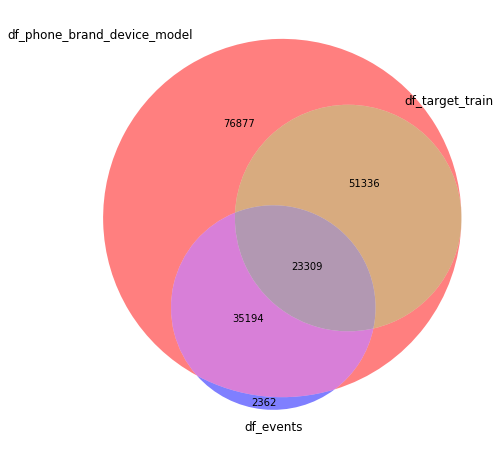

In [23]:
# venn3
from matplotlib_venn import venn3, venn3_circles
fig, ax = plt.subplots(figsize=(8,8))
venn3(subsets = (186716-74645-58503+23309, 74645-74645-23309+23309,   74645-23309,  60865-58503-23309+23309, 58503-23309, 23309-23309, 23309), 
      set_labels = ('df_phone_brand_device_model', 'df_target_train', 'df_events'), 
      set_colors=('r', 'g', 'b'), alpha = 0.5, ax=ax)
plt.show()

### Now we know that there 23,309 device_id we can use, we can start to merge dataframes and show some statistics and visulization

In [24]:
device_id_focus = (np.intersect1d(df_target_train_newgrp.device_id.values, 
                 np.intersect1d(df_phone_brand_device_model_parse.device_id.values, df_events.device_id.values)))
len(device_id_focus)

23309

In [25]:
df_target_device_merge = pd.merge(df_target_train_newgrp[df_target_train_newgrp.device_id.isin(device_id_focus)],
                                 df_phone_brand_device_model_parse[df_phone_brand_device_model_parse.device_id.isin(device_id_focus)][['device_id', 'brand_parse', 'model_parse']],
                                 on='device_id',
                                 how='inner')
df_target_device_merge.head()

,device_id,gender,age,group,age_cate,brand_parse,model_parse
0,-8260683887967679142,M,35,M32-38,A32-40,Xiaomi,MI 2
1,6352067998666467520,M,32,M32-38,A32-40,Huawei,Glory Play 4X
2,-7216269352973401877,M,37,M32-38,A32-40,Samsung,Galaxy Mega 6.3
3,3444770318780911055,M,36,M32-38,A32-40,Xiaomi,MI 4
4,-1246353335731124816,M,32,M32-38,A32-40,Samsung,Galaxy Note 2


# Actual EDA

### device popularity amoung users (brand)

In [26]:
df_target_device_merge.groupby('brand_parse').device_id.count().sort_values(ascending=False).reset_index()

,brand_parse,device_id
0,Xiaomi,5626
1,Huawei,5294
2,Samsung,3281
3,OPPO,1954
4,Meizu,1788
...,...,...
84,Hewlett-Packard,1
85,This is,1
86,If the meter,1
87,Kivu,1


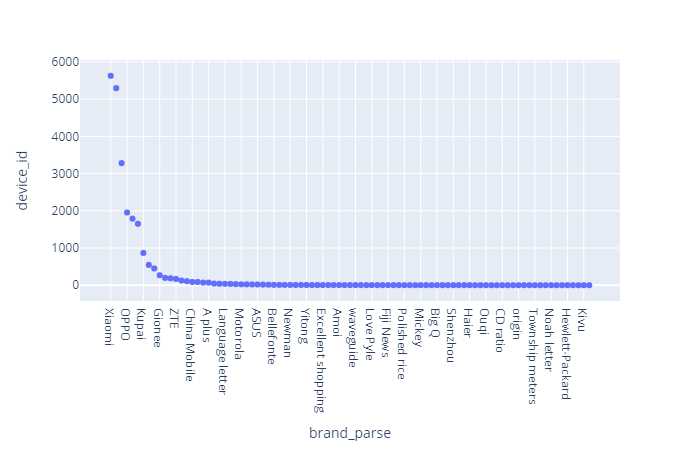

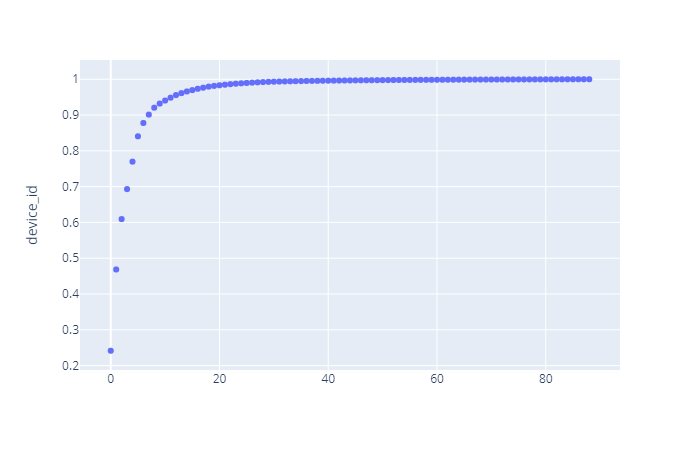

In [27]:
import plotly.express as px
fig = px.scatter(data_frame=df_target_device_merge.groupby('brand_parse').device_id.count().sort_values(ascending=False).reset_index(),
        x='brand_parse', y='device_id')
fig.show(renderer='png')
fig =px.scatter(data_frame=df_target_device_merge.groupby('brand_parse').device_id.count().sort_values(ascending=False).cumsum()/
        df_target_device_merge.groupby('brand_parse').device_id.count().sum(),
         y='device_id')
fig.show(renderer='png')

In [28]:
brand_list_sort_by_device = df_target_device_merge.groupby('brand_parse').device_id.count().sort_values(ascending=False).index
brand_list_sort_by_device

Index(['Xiaomi', 'Huawei', 'Samsung', 'OPPO', 'Meizu', 'vivo', 'Kupai',
       'Lenovo', 'TV Plus', 'Gionee', 'HTC', 'Nubia', 'ZTE', 'Sony', 'hammer',
       'China Mobile', 'Qiku', 'LG', 'A plus', 'TCL', 'ZUK', 'Language letter',
       'Hisense', 'Amagatarai', 'Motorola', 'Duo CD', 'Mito', 'ASUS', 'Doo',
       'Ai Unocal', 'Bellefonte', 'Quality rice', 'Ni Bilu', 'Newman', 'Nokia',
       'One hundred Li & Fung', 'Yitong', 'CUBE', 'Dimensional map',
       'Excellent shopping', 'Ling Yun', 'Konka', 'Amoi', 'Big Cola', 'Google',
       'waveguide', 'Monkey King', 'Banghua', 'Love Pyle', 'Only meters',
       'Dream meters', 'Fiji News', 'O'Brien letter', 'InFocus',
       'Polished rice', 'Feng Wopu', 'Blue demon', 'Mickey', 'Obi',
       'Koku Perot', 'Big Q', 'E school', 'Lovme', 'Shenzhou', 'Scallion',
       'Simi', 'Haier', 'Oral-Di', 'Changhong', 'Ouqi', 'Bacardi', 'Amazon',
       'CD ratio', 'Ou', 'Tianyuan century', 'origin', 'Daxian', 'Desai',
       'Township meters', 'Fre

### From the plot we can see, 
- the brand popularity among users are very imbalanced, 
- out of 90- brand, the top 10 brand alread contribute 95% of the popularity
- The top brand popularity among users are 'Xiaomi', 'Huawei', 'Samsung', 'OPPO', 'Meizu', 'vivo', 'Kupai', etc.

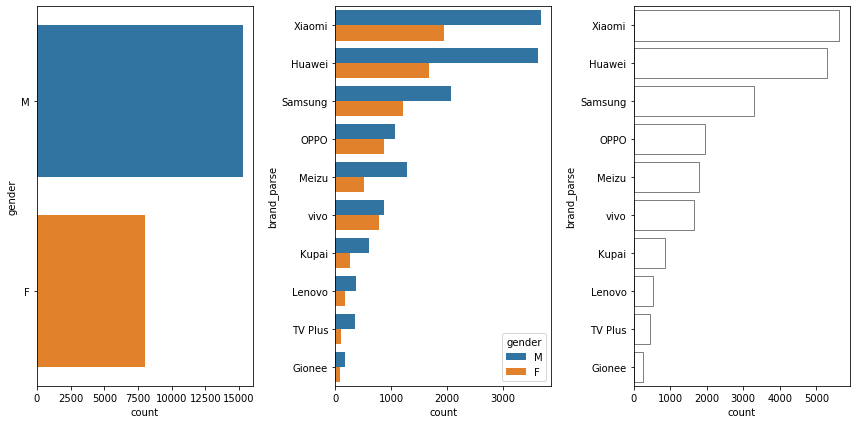

In [29]:
# I normally like to plot all three together to represent the nested relationship
# age-cate countplot

order_tmp = brand_list_sort_by_device[:10]
fig, ax = plt.subplots(1,3,figsize=(4*3,6))

sns.countplot(data=df_target_device_merge,
              y='gender',
#               x='gender',
#               hue='gender'              
#               order=df_age_cate_link.age_cate.unique(),
#              palette='Set1_r',
              ax=ax[0]
             )

sns.countplot(data =df_target_device_merge, y='brand_parse', 
              order=order_tmp,     
#               palette='Set1',
              hue='gender', 
#               hue_order=df_age_cate_link.age_cate.unique(),
              ax=ax[1])

sns.countplot(data=df_target_device_merge,
              y='brand_parse', 
#               hue='gender',
#               palette='BuGn_d',
              color='gray',
              fill = False,
              Edgecolor='gray',
              order = order_tmp, ax=ax[2])

plt.tight_layout()
plt.show()

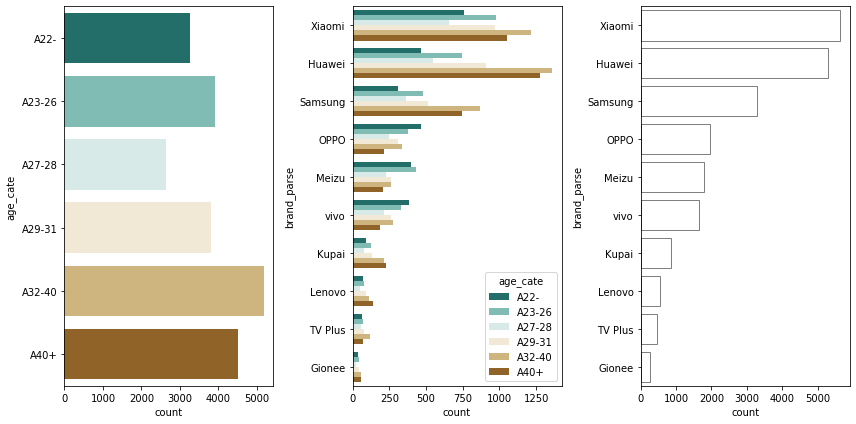

In [30]:
# I normally like to plot all three together to represent the nested relationship
# age-cate countplot

order_tmp = brand_list_sort_by_device[:10]
fig, ax = plt.subplots(1,3,figsize=(4*3,6))

sns.countplot(data=df_target_device_merge,
              y='age_cate',
#               x='gender',
#               hue='gender'              
              order=df_age_cate_link.age_cate.unique(),
             palette='BrBG_r',
              ax=ax[0]
             )

sns.countplot(data =df_target_device_merge, y='brand_parse', 
              order=order_tmp,     
              palette='BrBG_r',
              hue='age_cate', hue_order=df_age_cate_link.age_cate.unique(),
              ax=ax[1])

sns.countplot(data=df_target_device_merge,
              y='brand_parse', 
#               hue='gender',
#               palette='Accet',
#               color='gray',
#               facecolors='none', edgecolors='r',
              fill=False,
              Edgecolor='gray',
              order = order_tmp, ax=ax[2])

plt.tight_layout()
plt.show()

In [31]:
# It might be more intuitive to display the ratio of popularity

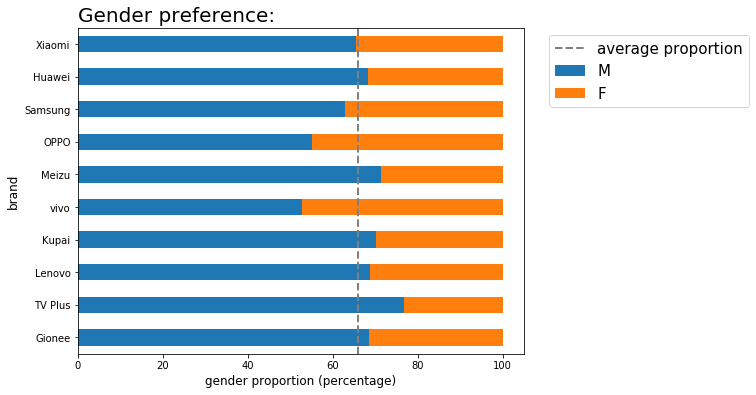

In [32]:
# Gender preference on brand
d1 = df_target_device_merge.loc[df_target_device_merge.brand_parse.isin(brand_list_sort_by_device[:10])].groupby(
    ["brand_parse","gender"]).device_id.count()

d2 = d1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
d2 = d2.reindex(brand_list_sort_by_device[:10][::-1], level =0).reindex(['M','F'],level=1)
# pallete_tmp = sns.color_palette('Set1', 2)
d2.unstack().plot(kind='barh',stacked=True,figsize = (8,6), 
#                   color=pallete_tmp
                 )
plt.axvline(d2.unstack()["M"].mean(),color = "gray", lw=2, linestyle='--', label='average proportion')
plt.xlabel("gender proportion (percentage)",fontsize = 12)
plt.ylabel("brand",fontsize = 12)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",fontsize = 15)
plt.title("Gender preference: ", loc='left', fontsize = 20)
plt.show()
# \nFemale user prefer Vivo, OPPO, and Samsung

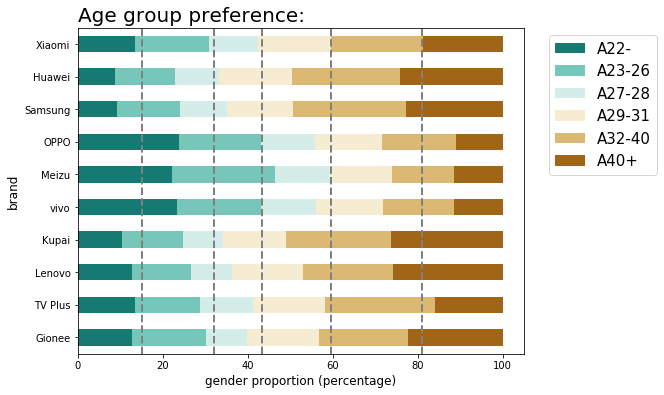

In [33]:
# age_group preference on brand
d1 = df_target_device_merge.loc[df_target_device_merge.brand_parse.isin(brand_list_sort_by_device[:10])].groupby(
    ["brand_parse","age_cate"]).device_id.count()

d2 = d1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
d2 = d2.reindex(brand_list_sort_by_device[:10][::-1], level =0).reindex(df_age_cate_link.age_cate.unique(),level=1)
pallete_tmp = sns.color_palette('BrBG_r', 6)
d2.unstack().plot(kind='barh',stacked=True,figsize = (8,6), 
                  color=pallete_tmp
                 )
mean_tmp = 0
for age in df_age_cate_link.age_cate.unique()[:-1]:
    mean_tmp +=d2.unstack()[age].mean()
    plt.axvline(mean_tmp,color = "gray", lw=2, linestyle='--')
plt.xlabel("gender proportion (percentage)",fontsize = 12)
plt.ylabel("brand",fontsize = 12)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",fontsize = 15)
plt.title("Age group preference: ", loc='left',fontsize = 20)
plt.show()
# \nOlder group prefer Xiaomi, Huawei, Wamsung, \nyouger group prefer OPPO, Meizu, vivo

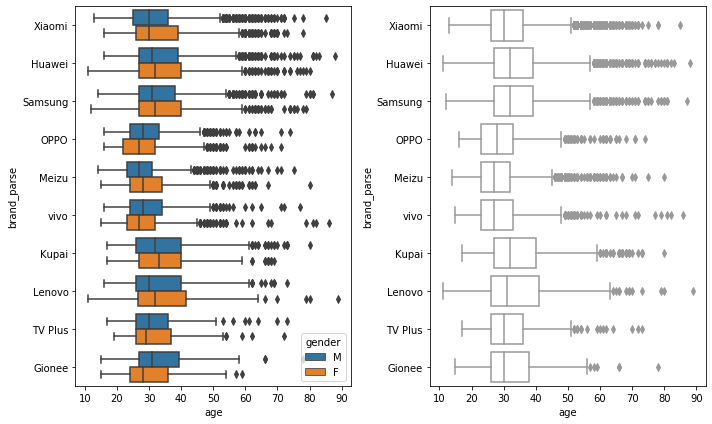

In [34]:
# last but not least, gender, age (numerical), and the brand
order_tmp = brand_list_sort_by_device[:10]
fig, ax = plt.subplots(1,2,figsize=(10,6))
sns.boxplot(data=df_target_device_merge, x='age', y='brand_parse' , 
            order=order_tmp, 
            hue='gender', ax=ax[0])
sns.boxplot(data=df_target_device_merge, x='age', y='brand_parse',
            order=order_tmp, 
#             palette='BuGn_d', 
            color='white',
            ax=ax[1])
plt.tight_layout()
plt.show()

### similarly we can analysis popularity of model.
We can even combine the popularity of both brand and model and analyze that across user demographics. But here we just make it simple and have a brief idea what the model distribution looks like

In [35]:
df_target_device_merge.groupby(['model_parse', 'brand_parse']).device_id.count().sort_values(ascending=False).reset_index()

,model_parse,brand_parse,device_id
0,Red rice note,Xiaomi,974
1,MI 4,Xiaomi,884
2,Galaxy Note 3,Samsung,610
3,Glory 6,Huawei,584
4,MI 3,Xiaomi,581
...,...,...,...
937,Mirror X5,Desai,1
938,Moto Turbo,Motorola,1
939,Moto X extreme,Motorola,1
940,N1,Nokia,1


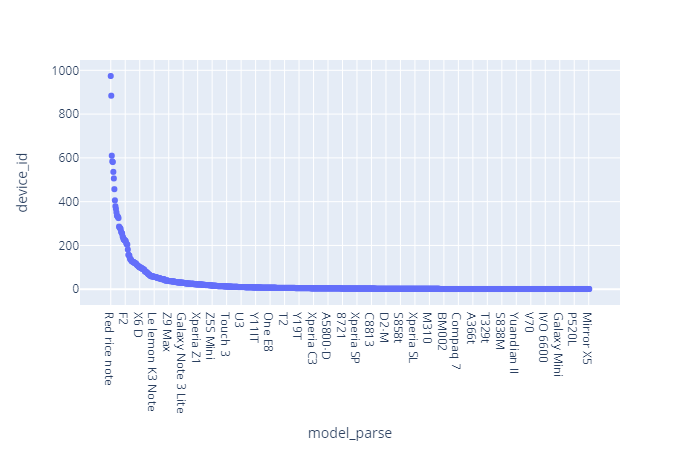

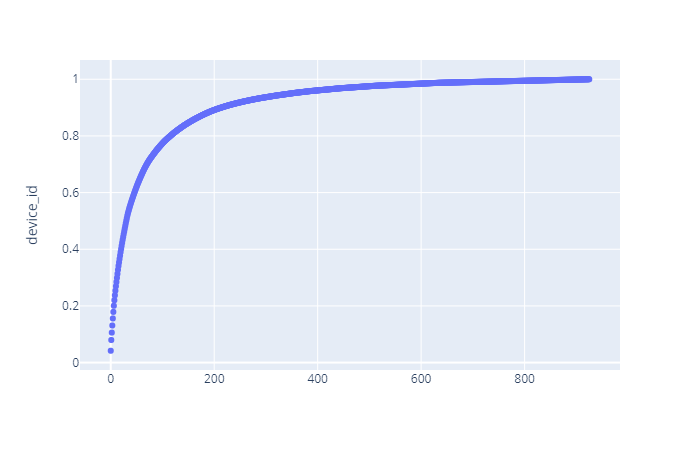

In [36]:
fig = px.scatter(data_frame=df_target_device_merge.groupby('model_parse').device_id.count().sort_values(ascending=False).reset_index(),
        x='model_parse', y='device_id')
fig.show(renderer='png')
fig =px.scatter(data_frame=df_target_device_merge.groupby('model_parse').device_id.count().sort_values(ascending=False).cumsum()/
        df_target_device_merge.groupby('model_parse').device_id.count().sum(),
         y='device_id')
fig.show(renderer='png')

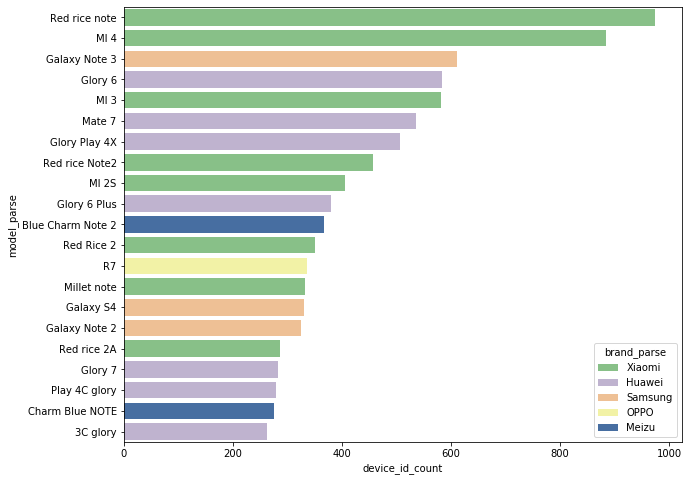

In [37]:
df_tmp = df_target_device_merge.groupby(['model_parse', 'brand_parse']).device_id.count().\
    sort_values(ascending=False).reset_index().rename(columns={'device_id': "device_id_count"})
num_to_take = 20
hue_order=brand_list_sort_by_device[:df_tmp[:num_to_take].brand_parse.nunique()]

fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.barplot(data=df_tmp.loc[:num_to_take,:], x='device_id_count', y='model_parse', hue='brand_parse', hue_order=hue_order,
            palette='Accent', ci=None, dodge=False, ax=ax)
plt.show()

### The popularity of model is also imbalanced
- Here we spot 20-80 phenomena: the top 20% models account for more than 80% of the market.
- Also, we can see that the top 20 popular models among users come from the top 5 popular brands.

# Move on and work on event data
Next, let's work on the event data. First let's merge them

In [38]:
df_target_device_event_merge = pd.merge(df_target_device_merge,
                                        df_events[df_events.device_id.isin(device_id_focus)],
                                        on='device_id')
df_target_device_event_merge.head()

,device_id,gender,age,group,age_cate,brand_parse,model_parse,event_id,timestamp,longitude,latitude
0,-8260683887967679142,M,35,M32-38,A32-40,Xiaomi,MI 2,2479656,2016-05-01 14:23:37,0.0,0.0
1,6352067998666467520,M,32,M32-38,A32-40,Huawei,Glory Play 4X,7665,2016-05-05 09:36:50,0.0,0.0
2,6352067998666467520,M,32,M32-38,A32-40,Huawei,Glory Play 4X,223251,2016-05-05 10:44:38,0.0,0.0
3,6352067998666467520,M,32,M32-38,A32-40,Huawei,Glory Play 4X,375447,2016-05-05 12:52:14,0.0,0.0
4,6352067998666467520,M,32,M32-38,A32-40,Huawei,Glory Play 4X,973134,2016-05-03 22:25:27,0.0,0.0


In [39]:
# check if everything work as expected,
# change timestamp datatype to datetime
print('device_id unique: ', df_target_device_event_merge.device_id.nunique())
df_target_device_event_merge.timestamp = pd.to_datetime(df_target_device_event_merge.timestamp)
print('time span: ', df_target_device_event_merge.timestamp.max() - df_target_device_event_merge.timestamp.min())

device_id unique:  23309
time span:  7 days 00:07:44


In [40]:
df_target_device_event_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215595 entries, 0 to 1215594
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   device_id    1215595 non-null  int64         
 1   gender       1215595 non-null  object        
 2   age          1215595 non-null  int64         
 3   group        1215595 non-null  object        
 4   age_cate     1215595 non-null  object        
 5   brand_parse  1215595 non-null  object        
 6   model_parse  1215595 non-null  object        
 7   event_id     1215595 non-null  int64         
 8   timestamp    1215595 non-null  datetime64[ns]
 9   longitude    1215595 non-null  float64       
 10  latitude     1215595 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 111.3+ MB


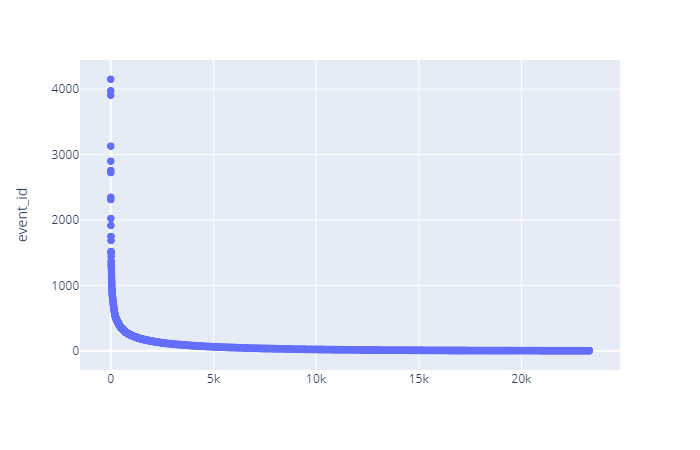

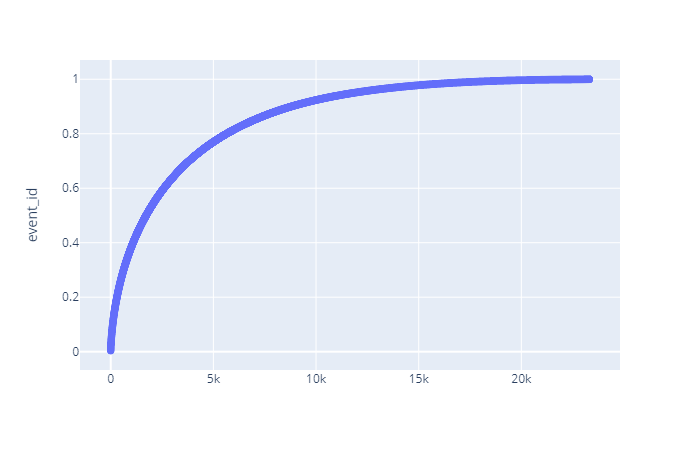

In [41]:
# check history event record number associated with the user
fig = px.scatter(data_frame=df_target_device_event_merge.groupby('device_id').event_id.count().sort_values(ascending=False).reset_index(),
         y='event_id')
fig.show(renderer='png')
fig =px.scatter(data_frame=df_target_device_event_merge.groupby('device_id').event_id.count().sort_values(ascending=False).cumsum()/
        df_target_device_event_merge.groupby('device_id').event_id.count().sum(),
         y='event_id')
fig.show(renderer='png')

### Imbalanced event record number
- Recall that we only focus on users (or devices) that have event records. But among the users, the number of history event records is very imbalanced. e.g., certain users have as much as 4,000+ event records, many users only have 1 record. 
- I am kinda suspect how much we can learn from such little information. But that's what we have now.
- We also found out that the event happen during a week in May, 2016. e.g., the time span between earlist and latest record is 7 days 00:07:44
- There might be many reason caused such imbalance in event record number. It can be either that the sampling rate is not consistent, or there might be other technical issues like communication interruption, or the users just didn't use their phones. If the cause is from technical reason, it will make the task even harder.

### some comment
#### I have to point out that the event count comment here is not the same as the record count in the former analysis, and is more useful.
Here the event count has its distribution and can be considered as a feauture (i.e. each deviced_id has an associated event_count), while the record count is just a number, i.e. discriptive statistics.

#### as mentioned earlier, if we consider event count as indicator how frequent users on their phones, then 
- the distributions across all three topics (i.e. gender, brand, age-categories) are heavy-tailed.
- male and female users have similar phone-using behavior
- Huawei and Lenovo users tend to use phone more often
- users in higher age group tend to use phone more often.

#### a reminder, if we want to include this feature for later ML model, it might be desired to tranform the data (i.e. quantile-transform, power-transform) to make the distribution more normal-like.

In [42]:
# add a new feature
df_target_device_merge_workon = pd.merge(df_target_device_merge,
                                        df_target_device_event_merge.groupby('device_id').event_id.count().reset_index().rename({'event_id':'event_counts'}, axis='columns'),
                                        on='device_id')
df_target_device_merge_workon.head()

,device_id,gender,age,group,age_cate,brand_parse,model_parse,event_counts
0,-8260683887967679142,M,35,M32-38,A32-40,Xiaomi,MI 2,1
1,6352067998666467520,M,32,M32-38,A32-40,Huawei,Glory Play 4X,11
2,-7216269352973401877,M,37,M32-38,A32-40,Samsung,Galaxy Mega 6.3,28
3,3444770318780911055,M,36,M32-38,A32-40,Xiaomi,MI 4,15
4,-1246353335731124816,M,32,M32-38,A32-40,Samsung,Galaxy Note 2,2


# GEO info
I like geo data. it is kinda hard to handel them, but it often show vivid visualization.


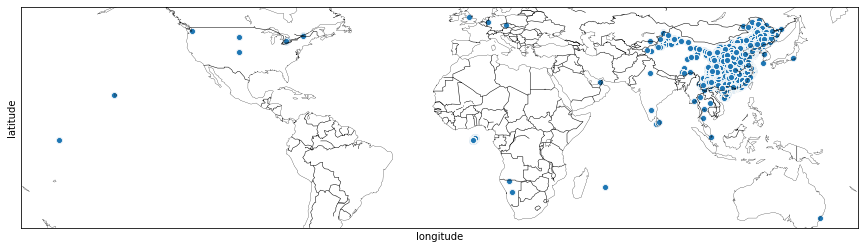

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(15,15), 
#                          gridspec_kw={'width_ratios': [3, 1]}
                        )

sns.scatterplot(df_target_device_event_merge.longitude,
               df_target_device_event_merge.latitude,
               ax=ax)
# ax.get_xlim()
# ax.get_ylim()
# Initialize the map
map = Basemap(llcrnrlon=ax.get_xlim()[0], urcrnrlon=ax.get_xlim()[1],
              llcrnrlat=ax.get_ylim()[0], urcrnrlat=ax.get_ylim()[1], )
 
# Continent and countries!
# map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, ax=ax)

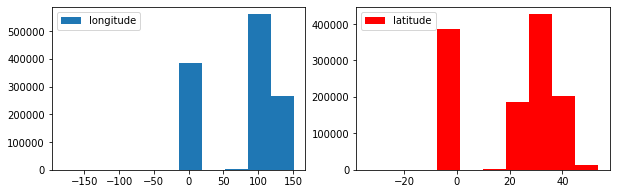

In [44]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].hist(df_target_device_event_merge.longitude, label='longitude')
ax[0].legend()
ax[1].hist(df_target_device_event_merge.latitude, color='r', label='latitude')
ax[1].legend()

- first sight about geo-data is that there exist a lot of 0. I don't think those make sense. Such 0 GPS data is normally hard to fill-na. (I will take a deeper look into it and confirm that's the case. i.e. check if the deviced_id assocaited to the zero-GPS ever had GPS record). 
-Note that, zero-GPS data also contributed a large proportion of the data (i.e. 30%). We probabely need to consider adaptive model to handel the target. i.e. one model use GPS data with less rows, another one without GPS data but with full rows (since GPS data is not easy to use anyways). 
- Last but not least, the zero-GPS records might still have prediction power, i.e. for some reason users from certain group are likely to disable GPS function, thus no GPS data for them. 
- This is similar to the outliers data, it is possible that those customers were traveling abroad or it could be errors. For now, let's first have some analysis on mainland china. (roughly long:[70,150],lat:[10,50]

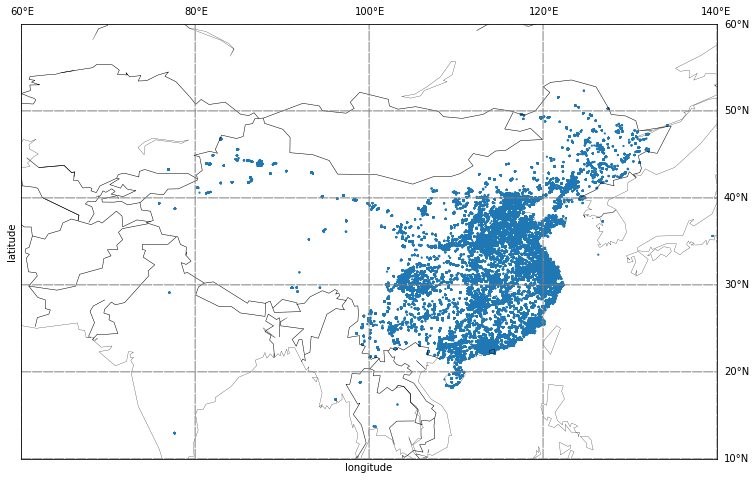

In [45]:
# focus on mainland china
fig, ax = plt.subplots(1,1, figsize=(15,8))
df_target_device_event_merge_mainland = df_target_device_event_merge[(df_target_device_event_merge.longitude>70) &
                            (df_target_device_event_merge.longitude<150)&
                            (df_target_device_event_merge.latitude>10) &
                            (df_target_device_event_merge.latitude<60)]
# df_merge_phone_events_focus_mainland.info()

# fig, ax = plt.subplots(1, 1, figsize=(15,15), 
#                          gridspec_kw={'width_ratios': [3, 1]}
#                         )

sns.scatterplot(data = df_target_device_event_merge_mainland,
                x='longitude',
                y='latitude',
                s=5,
                edgecolor ='none',      
                ax=ax)
# ax.get_xlim()
# ax.get_ylim()
ax.set_xlim(60,140)
ax.set_ylim(10,60)
# Initialize the map
map = Basemap(llcrnrlon=ax.get_xlim()[0], urcrnrlon=ax.get_xlim()[1],
              llcrnrlat=ax.get_ylim()[0], urcrnrlat=ax.get_ylim()[1], )

map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, zorder=0, ax=ax)

meridians = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],5)
map.drawmeridians(meridians,
                  labels=[0,0,1,0], dashes=[10,1], color='gray'
                 )
parallels = np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],6)
map.drawparallels(parallels,
                  labels=[0,1,1,0], 
                  dashes=[10,1], color='gray'
                 )

ax.set_aspect(aspect='equal')
# ax.legend(loc='upper right')



plt.show()

### From this one we can see that 
- user acitivities mostly happen on the east coast of China,
- there were barely record in the west, e.g., Hymalaya area and Gobi desert.
- We can also spot some activities outside China, like Japan, South Korea, India, etc.

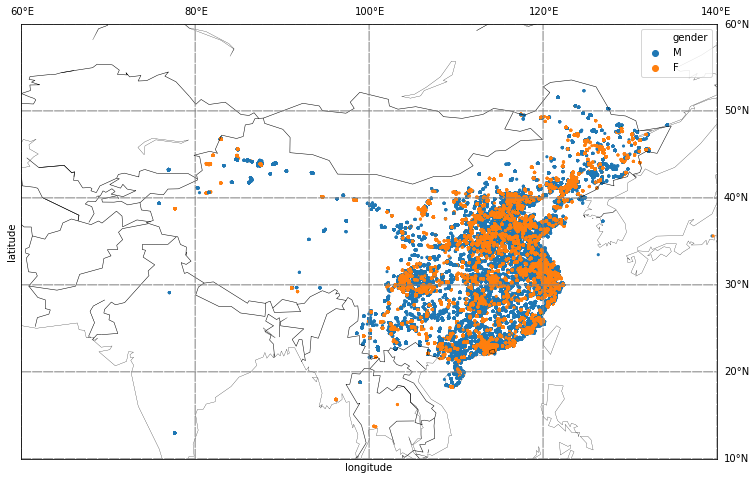

In [46]:
# what about the gender group?
fig, ax = plt.subplots(figsize=(15,8))



sns.scatterplot(data=df_target_device_event_merge_mainland,
                x='longitude',
                y='latitude',
                hue='gender',
#                 hue_order=np.append(order_tmp[:len(df_merge_phone_events_focus_mainland.brand_cuttail_5.unique())].values, 'other'),
#                 palette='Set2',
                edgecolor ='none',                
#                 alpha=0.005,
                s=10,
                ax=ax)


ax.set_xlim(60,140)
ax.set_ylim(10,60)
# Initialize the map
map = Basemap(llcrnrlon=ax.get_xlim()[0], urcrnrlon=ax.get_xlim()[1],
              llcrnrlat=ax.get_ylim()[0], urcrnrlat=ax.get_ylim()[1], )

map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, zorder=0, ax=ax)

meridians = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],5)
map.drawmeridians(meridians,
                  labels=[0,0,1,0], dashes=[10,1], color='gray'
                 )
parallels = np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],6)
map.drawparallels(parallels,
                  labels=[0,1,1,0], 
                  dashes=[10,1], color='gray'
                 )

ax.set_aspect(aspect='equal')
ax.legend(loc='upper right')



plt.show()

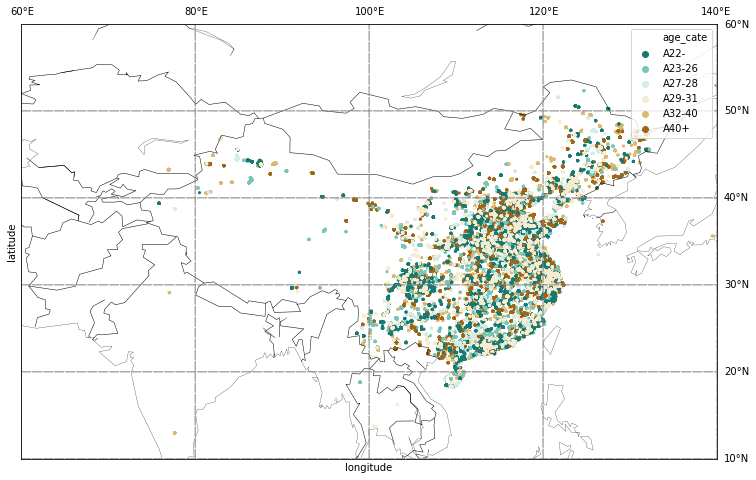

In [47]:
# about age-cate
fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(data=df_target_device_event_merge_mainland,
                x='longitude',
                y='latitude',
                hue='age_cate',
                hue_order=df_age_cate_link.age_cate.unique(),
                palette='BrBG_r',
                edgecolor ='none',                
#                 alpha=0.005,
                s=10,
                ax=ax)

ax.set_xlim(60,140)
ax.set_ylim(10,60)
# Initialize the map
map = Basemap(llcrnrlon=ax.get_xlim()[0], urcrnrlon=ax.get_xlim()[1],
              llcrnrlat=ax.get_ylim()[0], urcrnrlat=ax.get_ylim()[1], )

map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, zorder=0, ax=ax)

meridians = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],5)
map.drawmeridians(meridians,
                  labels=[0,0,1,0], dashes=[10,1], color='gray'
                 )
parallels = np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],6)
map.drawparallels(parallels,
                  labels=[0,1,1,0], 
                  dashes=[10,1], color='gray'
                 )

ax.set_aspect(aspect='equal')
ax.legend(loc='upper right')



plt.show()

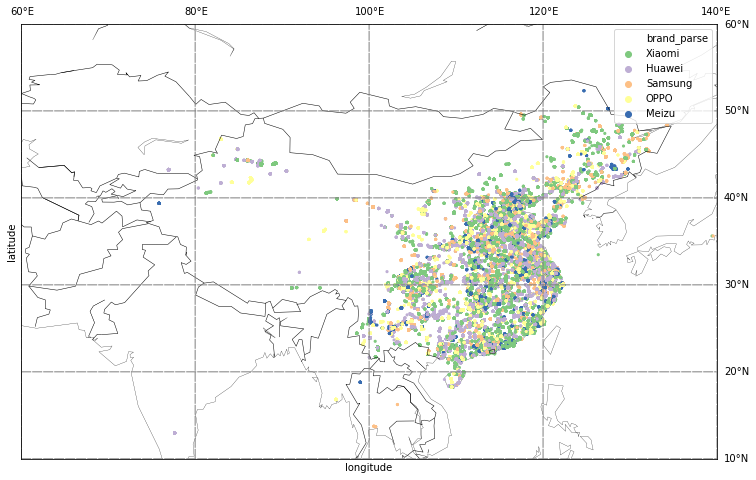

In [48]:
# another intersting to see the activity locations associated with brand (top 5 brand here)
# TIPS: for multiple color plot, don't use alpha, also you might want get rid of the edgecolor
# a little bit overwhelming, but it is what it is.
fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(data=df_target_device_event_merge_mainland[df_target_device_event_merge_mainland.brand_parse.
                                                           isin(brand_list_sort_by_device[:5])],#.sample(n=1000,random_state=1),
                x='longitude',
                y='latitude',
                hue='brand_parse',
                hue_order=brand_list_sort_by_device[:5],
                palette='Accent',
#                 alpha=0.005,
                s=10,
                edgecolor ='none',
                ax=ax)
ax.set_xlim(60,140)
ax.set_ylim(10,60)
# Initialize the map
map = Basemap(llcrnrlon=ax.get_xlim()[0], urcrnrlon=ax.get_xlim()[1],
              llcrnrlat=ax.get_ylim()[0], urcrnrlat=ax.get_ylim()[1], )

map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, zorder=0, ax=ax)

meridians = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],5)
map.drawmeridians(meridians,
                  labels=[0,0,1,0], dashes=[10,1], color='gray'
                 )
parallels = np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],6)
map.drawparallels(parallels,
                  labels=[0,1,1,0], 
                  dashes=[10,1], color='gray'
                 )

ax.set_aspect(aspect='equal')
ax.legend(loc='upper right')


plt.show()

## comment
- I don't think there is a very clear trend where certain target group users locate. 
- Also, note that since certain user group might have larger polupation to start with, when visualize user group using scatterplot we should consider such reason. We might also want normalize the event number per area
- another very important thing is the geo info analysis is based on event instead of users, i.e. many event can assocaite to the same users.

### let's go personal
we can found out which users have travel the longest distance

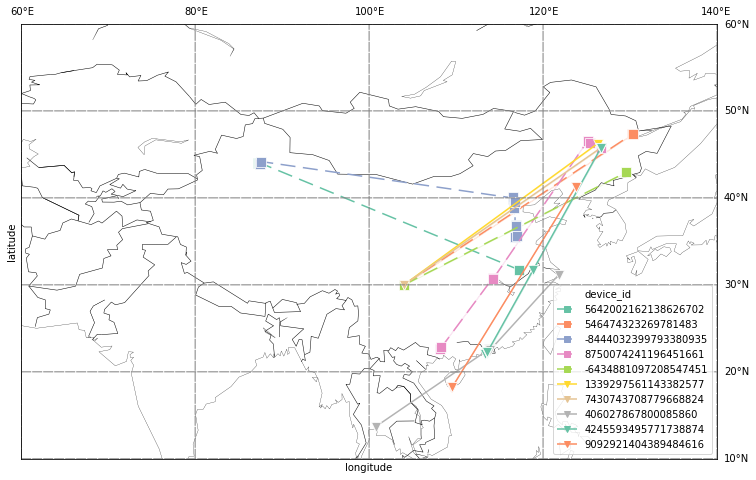

In [49]:
# next let's find out users travel long distance

# top 10 active (based on travel distance long*lat) users and their locations
# to make it more stable, at least 10 activities
# TIPS:

# df_merge_phone_events_focus_mainland = df_merge_phone_events_focus_mainland_original.copy()
# df_merge_phone_events_focus_mainland = df_merge_phone_events_focus_mainland_sampled.copy()

user_list_tmp = df_target_device_event_merge_mainland.device_id.value_counts()\
    [df_target_device_event_merge_mainland.device_id.value_counts().apply(lambda x: x>10)].index
user_list = (
            df_target_device_event_merge_mainland[df_target_device_event_merge_mainland.device_id.isin(user_list_tmp)]\
                 .groupby('device_id').longitude.agg(lambda x: np.square(x.max()-x.min())) +\
            df_target_device_event_merge_mainland[df_target_device_event_merge_mainland.device_id.isin(user_list_tmp)]\
                 .groupby('device_id').latitude.agg(lambda x: np.square(x.max()-x.min()))\
            ).sort_values(ascending=False).index[:10]
# user_list

df_user_single = df_target_device_event_merge_mainland[df_target_device_event_merge_mainland.device_id.\
                                                     isin(user_list)]
# df_user_single.head()

# last but not least age-cate
fig, ax = plt.subplots(figsize=(15,8))

# filled_markers = ['o', 'v', 's', ]*4
filled_markers = ['s']*5 + ['v']*5
# linestyles = ['-']*5 + ['--']*5
linestyles = [(10, 5)]*5 + [(1, 0)]*5
sns.lineplot(data=df_user_single,
             x='longitude',
             y='latitude',
             hue='device_id',
             hue_order=user_list,
             palette='Set2',
             #                 edgecolor ='none',                    
             style='device_id',
             style_order=user_list,
             dashes=linestyles,                     
             markers=filled_markers,
             markersize=10,
                ax=ax)

# Initialize the map
ax.set_xlim(60,140)
ax.set_ylim(10,60)
# Initialize the map
map = Basemap(llcrnrlon=ax.get_xlim()[0], urcrnrlon=ax.get_xlim()[1],
              llcrnrlat=ax.get_ylim()[0], urcrnrlat=ax.get_ylim()[1], )

map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, zorder=0, ax=ax)

meridians = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],5)
map.drawmeridians(meridians,
                  labels=[0,0,1,0], dashes=[10,1], color='gray'
                 )
parallels = np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],6)
map.drawparallels(parallels,
                  labels=[0,1,1,0], 
                  dashes=[10,1], color='gray'
                 )

ax.set_aspect(aspect='equal')
# ax.legend(loc='upper right')

ax.legend(loc='lower right')

plt.show()

### last but not least, we can extract geo data feature using descriptive stats
note 'std' might include null value

In [50]:
df_merge_device_gps = df_target_device_event_merge.groupby('device_id').longitude.agg('count').reset_index()[['device_id']]

df_merge_device_gps['lat_mean'] = df_target_device_event_merge.groupby('device_id').latitude.agg(['mean', 'std', 'median'])['mean'].values
df_merge_device_gps['lat_std'] = df_target_device_event_merge.groupby('device_id').latitude.agg(['mean', 'std', 'median'])['std'].values
df_merge_device_gps['lat_median'] = df_target_device_event_merge.groupby('device_id').latitude.agg(['mean', 'std', 'median'])['median'].values

df_merge_device_gps['long_mean'] = df_target_device_event_merge.groupby('device_id').longitude.agg(['mean', 'std', 'median'])['mean'].values
df_merge_device_gps['long_std'] = df_target_device_event_merge.groupby('device_id').longitude.agg(['mean', 'std', 'median'])['std'].values
df_merge_device_gps['long_median'] = df_target_device_event_merge.groupby('device_id').longitude.agg(['mean', 'std', 'median'])['median'].values

# df_merge_device_gps['event_count'] = df_merge_phone_events_focus.groupby('device_id').longitude.agg(['count'])['count'].values
df_merge_device_gps.fillna(0, inplace=True)

df_merge_device_gps.head()

,device_id,lat_mean,lat_std,lat_median,long_mean,long_std,long_median
0,-9222956879900151005,18.552000,9.348188,23.19,90.592000,45.648503,113.24
1,-9221026417907250887,27.721361,9.376818,30.87,102.692721,34.736061,114.36
2,-9220830859283101130,0.000000,0.000000,0.00,0.000000,0.000000,0.00
3,-9220061629197656378,34.964231,20.383561,46.60,93.666346,54.605899,124.88
4,-9218960997324667698,0.000000,0.000000,0.00,0.000000,0.000000,0.00


In [51]:
df_target_device_merge_workon = pd.merge(df_target_device_merge_workon,
                                        df_merge_device_gps,
                                        on='device_id')
df_target_device_merge_workon.head()

,device_id,gender,age,group,age_cate,brand_parse,model_parse,event_counts,lat_mean,lat_std,lat_median,long_mean,long_std,long_median
0,-8260683887967679142,M,35,M32-38,A32-40,Xiaomi,MI 2,1,0.0,0.0,0.0,0.0,0.0,0.0
1,6352067998666467520,M,32,M32-38,A32-40,Huawei,Glory Play 4X,11,0.0,0.0,0.0,0.0,0.0,0.0
2,-7216269352973401877,M,37,M32-38,A32-40,Samsung,Galaxy Mega 6.3,28,0.0,0.0,0.0,0.0,0.0,0.0
3,3444770318780911055,M,36,M32-38,A32-40,Xiaomi,MI 4,15,0.0,0.0,0.0,0.0,0.0,0.0
4,-1246353335731124816,M,32,M32-38,A32-40,Samsung,Galaxy Note 2,2,0.0,0.0,0.0,0.0,0.0,0.0


# Timestamp
- just like geo info, when we analysis timestamp the primary key is 'event_id'.
- However, since eventually we will predict targets with assocaited with the 'device_id', we might want to convert the primary key from 'event_id' to 'device_id'. But the question is how.
- maybe we can use descriptive statistics to extract the info. i.e. use average, median, std to describe timestamp (hour) distribution.

(array([44864., 27090., 20248., 16991., 16282., 24536., 43970., 55583.,
        59032., 62226., 68578., 62920., 62584., 58304., 56324., 55224.,
        57002., 58200., 57607., 61947., 65099., 67498., 61978., 51508.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

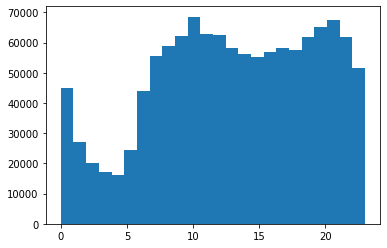

In [52]:
# plot hour hist
plt.hist(df_target_device_event_merge.timestamp.dt.hour, bins=24)

### activity for the whole sample population
- users are most active around 10:00 and 20:00 (8pm)
- most inactive around 4:00 (in sleep most likely)
- note that, in China, all the pople use GMT+8 China Standard Time, even though geographically the residents across 5 diffent time zone from very east to the west in China.

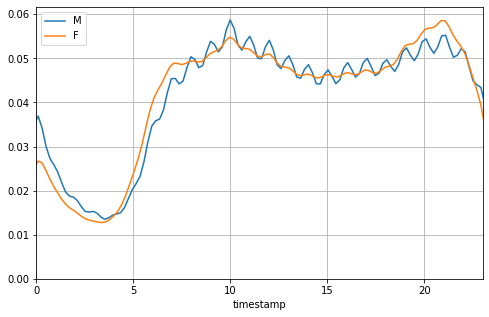

In [53]:
# normalized event-hour-log across gender (normalized)
fig, ax = plt.subplots(figsize=(8,5))
for value in df_target_device_event_merge.gender.unique():
    condition_tmp = (df_target_device_event_merge.gender==value)
    sns.distplot(df_target_device_event_merge[condition_tmp].timestamp.dt.hour, bins=24, 
                 kde=True,
                 hist=False,
                 norm_hist=True, 
#                  alpha=0.5, 
                 label=value,
                 ax=ax,             
                )
ax.set_xlim((0,23))
plt.grid()
plt.show()

In [54]:
# extract the hour feature
df_target_device_event_merge['hour'] = df_target_device_event_merge.timestamp.dt.hour
df_target_device_event_merge['hour_plus_four'] = df_target_device_event_merge.timestamp.dt.hour + 4

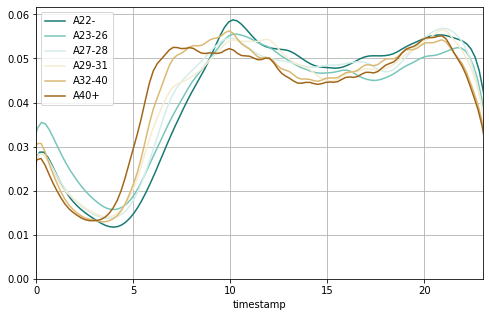

In [55]:
# normalized event-hour-log across age-cate (normalized)
fig, ax = plt.subplots(figsize=(8,5))
# for value in df_merge_phone_events_focus_mainland_original.age_cate.unique():
for i,value in    enumerate(['A22-', 'A23-26', 'A27-28', 'A29-31', 'A32-40', 'A40+']):
    condition_tmp = (df_target_device_event_merge.age_cate==value)
    sns.distplot(df_target_device_event_merge[condition_tmp].timestamp.dt.hour, bins=24, 
                 kde=True,
                 hist=False,
                 norm_hist=True, 
#                  alpha=0.5, 
                 label=value,
                 ax=ax,             
                 color = sns.color_palette('BrBG_r', 6)[i]
                )
ax.set_xlim((0,23))
plt.grid()
plt.show()

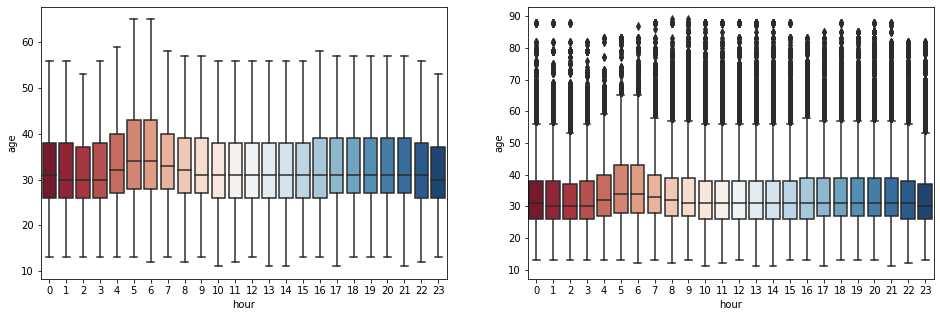

In [56]:
# # normalized event-hour-log across age using boxplot, w/ and w/o fliers
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.boxplot(data=df_target_device_event_merge, y='age', x='hour', 
            showfliers=False,
            palette='RdBu',
            ax=ax[0]
           )
sns.boxplot(data=df_target_device_event_merge, y='age', x='hour', 
            showfliers=True,
            palette='RdBu',
            ax=ax[1]
           )
plt.show()

### Some comment
- there is no significant difference among different age classes or age classes concerning timestamp. In other words, we cannot tell which target group an event belongs to just based on when such event happened.
- But there is some weak trend in the distribution. e.g. female users have more events record at 5-7am, and 8pm. As age increase, there are more events during 5-7am. This should make sense cause female users and users in older group tend to wake up earlier. (an extra support evidence is users from female group and older group have less event recorded at midnight, which indicates they go to bed already and thus be able to wake up early.)

In [57]:
# let's extract the descriptive stats
# note that hour is perodic data, descriptive stats might not be the best way for representation
df_target_device_merge_workon = pd.merge(
    df_target_device_merge_workon,
    df_target_device_event_merge.groupby('device_id').hour.agg(['mean', 'std', 'median'] ).reset_index().fillna(0).\
        rename({'mean':'hour_mean', 'std':'hour_std', 'median':'hour_median'}, axis='columns'),
    on = 'device_id')

df_target_device_merge_workon = pd.merge(
    df_target_device_merge_workon,
    df_target_device_event_merge.groupby('device_id').hour_plus_four.agg(['mean', 'std', 'median'] ).reset_index().fillna(0).\
        rename({'mean':'hour_plus_four_mean', 'std':'hour_plus_four_std', 'median':'hour_plus_four_median'}, axis='columns'),
    on = 'device_id')
df_target_device_merge_workon.head()

,device_id,gender,age,group,age_cate,brand_parse,model_parse,event_counts,lat_mean,lat_std,lat_median,long_mean,long_std,long_median,hour_mean,hour_std,hour_median,hour_plus_four_mean,hour_plus_four_std,hour_plus_four_median
0,-8260683887967679142,M,35,M32-38,A32-40,Xiaomi,MI 2,1,0.0,0.0,0.0,0.0,0.0,0.0,14.000000,0.000000,14.0,18.000000,0.000000,18.0
1,6352067998666467520,M,32,M32-38,A32-40,Huawei,Glory Play 4X,11,0.0,0.0,0.0,0.0,0.0,0.0,14.363636,5.005452,12.0,18.363636,5.005452,16.0
2,-7216269352973401877,M,37,M32-38,A32-40,Samsung,Galaxy Mega 6.3,28,0.0,0.0,0.0,0.0,0.0,0.0,11.250000,6.725435,12.0,15.250000,6.725435,16.0
3,3444770318780911055,M,36,M32-38,A32-40,Xiaomi,MI 4,15,0.0,0.0,0.0,0.0,0.0,0.0,15.466667,4.206571,13.0,19.466667,4.206571,17.0
4,-1246353335731124816,M,32,M32-38,A32-40,Samsung,Galaxy Note 2,2,0.0,0.0,0.0,0.0,0.0,0.0,5.500000,7.778175,5.5,9.500000,7.778175,9.5


In [58]:
# we can also bin-wise the hour distribution and represent it in a one-hot-encode style (but instead of one)


In [59]:
from sklearn.preprocessing import OneHotEncoder
ohencoder = OneHotEncoder(sparse=False,
    dtype='int8')

hour_encode = ohencoder.fit_transform(df_target_device_event_merge.hour.values.reshape(-1, 1))
hour_encode.shape

df_hour_encode = pd.DataFrame(hour_encode)
df_hour_encode.columns = ['hour_'+ str(i) for i in range(len(df_hour_encode.columns))]
df_hour_encode.index = df_target_device_event_merge.index
df_hour_encode 

df_target_device_event_merge_sample_encode = pd.concat([df_target_device_event_merge[['device_id']],
           df_hour_encode], axis=1, ignore_index=False)

# df_target_device_event_merge_sample_encode.groupby('device_id').agg('sum')
df_encode_hour_freq = (df_target_device_event_merge_sample_encode.groupby('device_id')[df_hour_encode.columns].agg('sum')/\
    df_target_device_event_merge_sample_encode.groupby('device_id')[df_hour_encode.columns].agg('count')).reset_index()
df_encode_hour_freq.head()

,device_id,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,-9222956879900151005,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.030769,0.000000,...,0.076923,0.338462,0.000000,0.000000,0.000000,0.000000,0.061538,0.092308,0.000000,0.046154
1,-9221026417907250887,0.0,0.0,0.00,0.0,0.0,0.000000,0.047619,0.292517,0.068027,...,0.000000,0.027211,0.088435,0.013605,0.027211,0.020408,0.176871,0.000000,0.088435,0.020408
2,-9220830859283101130,0.0,0.0,0.25,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000,0.125000,0.000000,0.250000
3,-9220061629197656378,0.0,0.0,0.00,0.0,0.0,0.000000,0.076923,0.019231,0.038462,...,0.096154,0.000000,0.019231,0.019231,0.076923,0.038462,0.019231,0.038462,0.000000,0.000000
4,-9218960997324667698,0.0,0.0,0.00,0.0,0.0,0.166667,0.000000,0.000000,0.000000,...,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000


In [60]:
df_target_device_merge_workon = pd.merge(df_target_device_merge_workon,
                                         df_encode_hour_freq,
                                         on='device_id'
                                        )
df_target_device_merge_workon.head()

,device_id,gender,age,group,age_cate,brand_parse,model_parse,event_counts,lat_mean,lat_std,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,-8260683887967679142,M,35,M32-38,A32-40,Xiaomi,MI 2,1,0.0,0.0,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,6352067998666467520,M,32,M32-38,A32-40,Huawei,Glory Play 4X,11,0.0,0.0,...,0.000000,0.0,0.000000,0.181818,0.090909,0.000000,0.000000,0.000000,0.181818,0.0
2,-7216269352973401877,M,37,M32-38,A32-40,Samsung,Galaxy Mega 6.3,28,0.0,0.0,...,0.214286,0.0,0.035714,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.0
3,3444770318780911055,M,36,M32-38,A32-40,Xiaomi,MI 4,15,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.266667,0.066667,0.133333,0.000000,0.0
4,-1246353335731124816,M,32,M32-38,A32-40,Samsung,Galaxy Note 2,2,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


# Before we move on to deal with app and the app labels, here is an interactive visualization on user activities.
In this visualization, you can find
- at what time the users are active
- where they are located
- which demographics they belong to (e.g., gender)

In [61]:
# display the relational dataset drawing (interactive plot)
url = 'https://chart-studio.plotly.com/~mynameismo/17.embed'
IPython.display.IFrame(url, width=1000, height=600)

# app event
- for app, app_label and app_category, we need some NLP techniques.
- Be very careful when trying to merge this, because it is huge

In [62]:
df_app_events_original.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


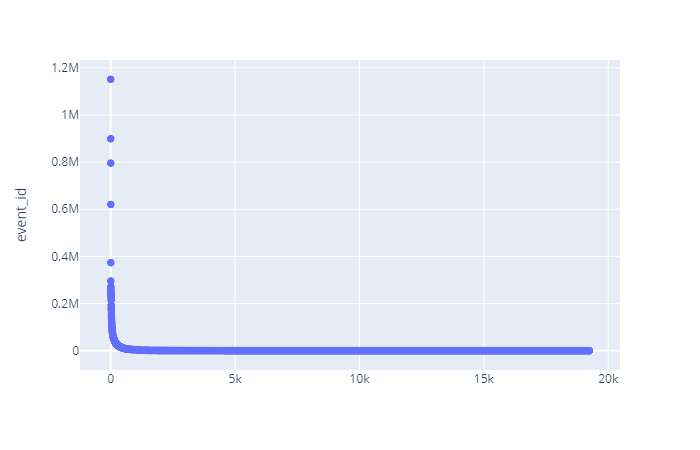

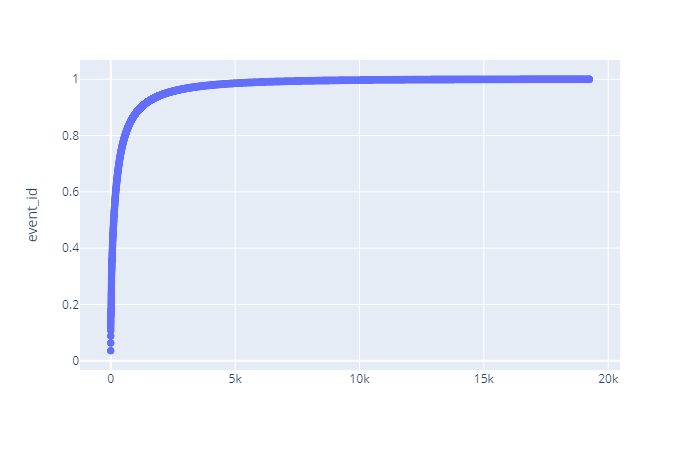

In [63]:
fig = px.scatter(data_frame=df_app_events_original.groupby('app_id').event_id.count().sort_values(ascending=False).reset_index(),
         y='event_id')
fig.show(renderer='png')
fig =px.scatter(data_frame=df_app_events_original.groupby('app_id').event_id.count().sort_values(ascending=False).cumsum()/
        df_app_events_original.groupby('app_id').event_id.count().sum(),
         y='event_id')
fig.show(renderer='png')

### There are 20k- apps!!!
- By the app_event dataframe, only 1/20 (less than 1k) apps are used often. Such top 1k apps contribute 90% of the app usage.
- Later on we will choose a cut-off, e.g. top 1000 or top 500 to feed in the tabular model. For RNN model, we can choose higher threshold, e.g. cut-off = 5k,
- Note that, even some app appear very frequent, it doesn't mean it would be helpful for prediction.
- Due to the nature of relational datasets, this is the difficult part when it comes to modeling. e.g., how should we extract the feautre of is_active, how do we feed this information in the tabular dataframe. Even for RNN, this is not very straightforward.  

# app_labels
similarly,...

In [64]:
df_app_labels.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


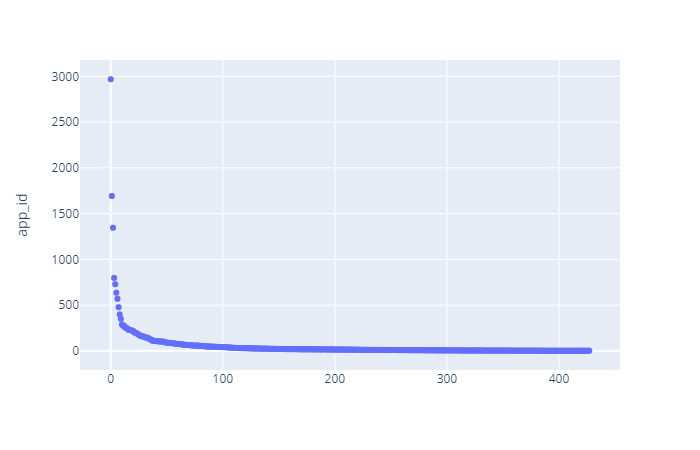

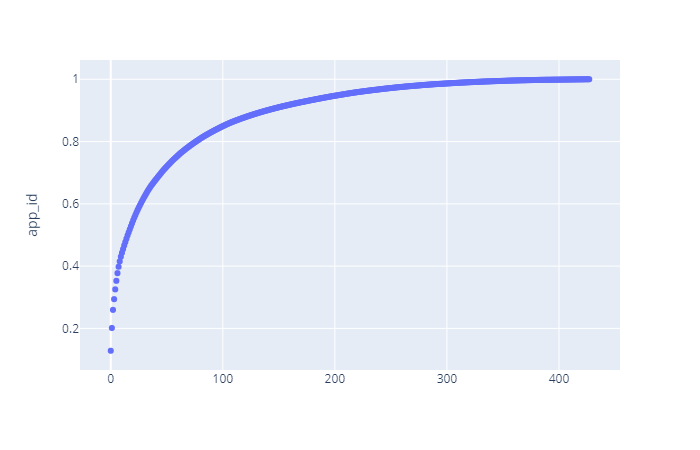

In [65]:
# only consider the top 5000 app and their associated label
condition_tmp = df_app_labels.app_id.isin(df_app_events_original.groupby('app_id').app_id.count().sort_values(ascending=False).index[:5000])
fig = px.scatter(data_frame=df_app_labels[condition_tmp].groupby('label_id').app_id.count().sort_values(ascending=False).reset_index(),
         y='app_id')
fig.show(renderer='png')
fig =px.scatter(data_frame=df_app_labels[condition_tmp].groupby('label_id').app_id.count().sort_values(ascending=False).cumsum()/
        df_app_labels[condition_tmp].groupby('label_id').app_id.count().sum(),
         y='app_id')
fig.show(renderer='png')

# app_categories

In [66]:
df_label_categories.head()

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


In [67]:
df_label_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label_id  930 non-null    int64 
 1   category  927 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.7+ KB


In [70]:
# we only care about those label_id appear somewhere else in this datasets,
# actually, let's only consider those label_id associated with the top 1,000 apps
app_id_list = df_app_events_original.app_id.value_counts().index
df_label_categories_valid = df_label_categories[df_label_categories.label_id.
                                                isin(df_app_labels[df_app_labels.app_id.isin(app_id_list[:1000])].label_id)]
df_label_categories_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 7 to 928
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label_id  296 non-null    int64 
 1   category  296 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.9+ KB


In [71]:
df_label_categories_valid.groupby('category').label_id.count().sort_values(ascending=False)

category
unknown                  5
Lottery ticket           3
Financial Information    3
pursue                   2
Direct Banking           2
                        ..
WIFI                     1
Utilities                1
User Community           1
Trendy / cool 1          1
1 free                   1
Name: label_id, Length: 274, dtype: int64

In [72]:
df_label_categories_valid.groupby('label_id').category.count().sort_values(ascending=False)

label_id
1020    1
217     1
220     1
221     1
222     1
       ..
770     1
771     1
773     1
774     1
8       1
Name: category, Length: 296, dtype: int64

### for app_category data
- several label_id has the same category, we might consider group them and rename as just one label id
- for 'unknown' and NULL category iterms, we can rename them as 'unknown' (though, might not be useful either)
- Some more sophisticated NLP algorithm can be applied to to process the category and extract features (e.g. segmentation based on the inherent meaning given to the category names). But this is out of the scope of this project.
- For demonstration purpose, we can use word cloud to illustrate the category freqency after merge with app_id. (TBH, it didn't give me much intuition about the category data either)

### handel duplicate

In [73]:
# df_label_categories_find_dup = df_label_categories_valid[df_label_categories_valid.category.duplicated(keep=False)].sort_values('category')
# df_label_categories_find_dup.head()

# use the label_id_parse to represent the duplicate category
df_label_categories_valid.loc[:,'label_id_parse'] = df_label_categories_valid.groupby('category')['label_id'].transform('first')
df_label_categories_valid.head()
df_label_categories_valid[df_label_categories_valid.category.duplicated(keep=False)].sort_values('category').head()

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,label_id,category,label_id_parse
202,221,Accounting,221
918,1010,Accounting,221
926,1018,Direct Banking,758
678,758,Direct Banking,758
921,1013,Financial Information,162


In [74]:
# up date the df_app_labels and df_app_event, i.e.,use label_id_parse,
df_app_labels.head()
df_app_labels_new = pd.merge(df_app_labels, 
                         df_label_categories_valid,
                         on='label_id',
                        )
# df_app_labels_new.head()

### merge event, app, app_label, app_category
- use the label_parse
- only take the top 1000 app

In [78]:
# merge with app_event, 
df_app_event = df_app_events_original.drop('is_installed', axis=1)
df_event_app_label_category_merge_focus = pd.merge(df_app_event[df_app_event.app_id.isin(app_id_list[:1000])],
                                                   df_app_labels_new[df_app_labels_new.app_id.isin(app_id_list[:1000])].drop('label_id', axis=1),
                                                   on='app_id',
)
# df_event_app_label_category_merge_focus.head()
df_event_app_label_category_merge_focus.is_active= df_event_app_label_category_merge_focus.is_active.astype('int8')

,event_id,app_id,is_active,category,label_id_parse
0,2,5927333115845830913,1,Property Industry 1.0,549
1,2,5927333115845830913,1,Industry tag,548
2,2,5927333115845830913,1,Relatives 1,710
3,2,5927333115845830913,1,Property Industry 2.0,704
4,2,5927333115845830913,1,IM,172


In [110]:
# merge 
# note: need to use 'out left'
df_device_event_app_label_category_merge_focus = pd.merge(df_events[df_events.device_id.isin(device_id_focus)][['device_id', 'event_id']],
                                                          df_event_app_label_category_merge_focus,
                                                          on='event_id',
                                                          how='left')
df_device_event_app_label_category_merge_focus.head()

,device_id,event_id,app_id,is_active,category,label_id_parse
0,29182687948017175,1,NaN,NaN,NaN,NaN
1,-4833982096941402721,3,NaN,NaN,NaN,NaN
2,-6815121365017318426,4,NaN,NaN,NaN,NaN
3,-5373797595892518570,5,NaN,NaN,NaN,NaN
4,1476664663289716375,6,5.927333e+18,1.0,Property Industry 1.0,549.0


In [111]:
# fillna
(df_app_labels.app_id==0).any()
df_label_categories_valid[df_label_categories_valid.category=='unknown']

df_device_event_app_label_category_merge_focus.app_id.fillna(0, inplace=True)
df_device_event_app_label_category_merge_focus.is_active.fillna(0, inplace=True)
df_device_event_app_label_category_merge_focus.category.fillna('unknown', inplace=True)
df_device_event_app_label_category_merge_focus.label_id_parse.fillna(302, inplace=True)

In [112]:
# transfer data type
df_device_event_app_label_category_merge_focus.app_id = df_device_event_app_label_category_merge_focus.app_id.astype('int64')
df_device_event_app_label_category_merge_focus.is_active = df_device_event_app_label_category_merge_focus.is_active.astype('int8')
df_device_event_app_label_category_merge_focus.label_id_parse = df_device_event_app_label_category_merge_focus.label_id_parse.astype('int16')

In [113]:
# no more null value
df_device_event_app_label_category_merge_focus.isna().any()

device_id         False
event_id          False
app_id            False
is_active         False
category          False
label_id_parse    False
dtype: bool

In [114]:
df_device_event_app_label_category_merge_focus.head()

,device_id,event_id,app_id,is_active,category,label_id_parse
0,29182687948017175,1,0,0,unknown,302
1,-4833982096941402721,3,0,0,unknown,302
2,-6815121365017318426,4,0,0,unknown,302
3,-5373797595892518570,5,0,0,unknown,302
4,1476664663289716375,6,5927333115845830656,1,Property Industry 1.0,549


In [116]:
df_device_event_app_label_category_merge_focus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72852224 entries, 0 to 72852223
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   device_id       int64 
 1   event_id        int64 
 2   app_id          int64 
 3   is_active       int8  
 4   category        object
 5   label_id_parse  int16 
dtypes: int16(1), int64(3), int8(1), object(1)
memory usage: 2.9+ GB


In [115]:
# df_device_event_app_label_category_merge_focus.to_pickle('./df_device_event_app_label_category_merge_focus.pkl')

### word cloud

In [83]:
# app_id_list = df_event_app_label_category_merge_focus.app_id.value_counts().index
df_sample = df_event_app_label_category_merge_focus.sample(n=1000, random_state = RANDOM_STATE)
app_id_top_2000 = app_id_list[:1000]
app_id_top_200 = app_id_list[:200]
val_count_tmp = df_sample[df_sample.app_id.isin(app_id_top_2000)].category.value_counts()

In [84]:
val_count_tmp

Industry tag             118
Property Industry 2.0     90
Property Industry 1.0     72
unknown                   69
Services 1                34
                        ... 
tourism product            1
Insurance                  1
Direct Banking             1
Property Industry new      1
Trendy / cool              1
Name: category, Length: 124, dtype: int64

(-0.5, 999.5, 719.5, -0.5)

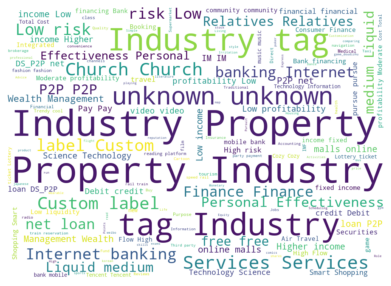

In [85]:
# viuslize using wordcloud (ignore syntax within the category name, e.g. industry 2.0 would become industry)
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image


fig, ax = plt.subplots(1,1, figsize=(8,5))

wc = WordCloud(background_color='white', random_state=RANDOM_STATE+1,
              width=200*5, height=240*3,)

# text = df_tmp.label_id_list.str.cat(sep=' ')
text = [(cate_name+" ") * val for cate_name,val in zip(val_count_tmp.index,val_count_tmp)]
text
wc.generate(str(text))

default_color = 'grey'

ax.imshow(wc, interpolation='bilinear', )
ax.axis("off")

(-0.5, 999.5, 719.5, -0.5)

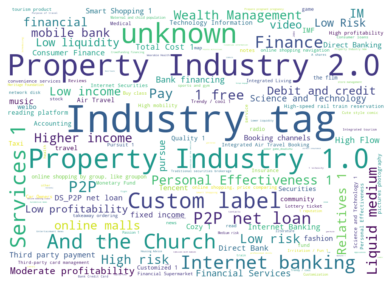

In [82]:
# use frequency (maintain the original category)
# from wordcloud import WordCloud, ImageColorGenerator
# from PIL import Image

freq_dict = val_count_tmp.to_dict()
freq_dict

fig, ax = plt.subplots(1,1, figsize=(8,5))

wc = WordCloud(background_color='white', random_state=RANDOM_STATE+1,
              width=200*5, height=240*3,)


wc.generate_from_frequencies(frequencies=freq_dict)

default_color = 'grey'

ax.imshow(wc, interpolation='bilinear', )
ax.axis("off")

# End of EDA
By now we finished EDA.
Due to the nature of the datasets, e.g., 6 relational dataframes and most of the features are categorical. The emphasize here is to show the relation ship, and by using pd.merge to create tabular data to work on.
While The dataset is noisy, and exist abnomal data (e.g. 0,0 GPS coordinates). We still achieve some insights about the target. Summarize as following:
### About brand
- The brand popularity among users are very imbalanced: out of the about 90 brands, the top 10 brand alread contribute 95% of the popularity. The market is dominated by the top 10 brands.
- The top 10 brand count by device_id in this dataset are 'Xiaomi', 'Huawei', 'Samsung', 'OPPO', 'Meizu', 'vivo', 'Kupai', 'Lenovo', 'TV Plus', 'Gionee'. 
- In gender group, Female user prefer Vivo, OPPO, and Samsung. 
- In age group, older group prefer Xiaomi, Huawei, Wamsung, while youger group prefer OPPO, Meizu, vivo. 
### About model
- The popularity of model is also imbalanced: we spot 20-80 phenomena: the top 20% models account for more than 80% of the market.
- Also, we can see that the top 20 popular models among users come from the top 5 popular brands.
- (since there are too many models, we didn't analyse the demographics profile across models)
### About geo info
- From the geo-scatter plot, we confirm that user acitivities mostly happen on the east coast of China; there were barely record in the west, e.g., Hymalaya area and Gobi desert; there are some outside China, like Japan, South Korea, India, etc.
- We also use geo-scatter plot and color code the different categories, e.g., gender, age_cate, top 5 brands. The distribution didn't show very obvious trend though. 
- since certain user group might have larger polupation to start with, when visualize user group using scatterplot we should consider such reason. We might also want normalize the event number per area. 
- We extract the feauture of latitude and longitude using descriptive statistics (e.g. mean, std, median)
### About timestamp
- users are most active around 10:00 and 20:00 (8pm), most inactive around 4:00 (in sleep most likely)
- note that, in China, all the pople use GMT+8 China Standard Time, even though geographically the residents across 5 diffent time zone from very east to the west in China.
- There is some weak trend in the distribution. e.g. female users have more events record at 5-7am, and 8pm. As age increase, there are more events during 5-7am. This should make sense cause female users and users in older group tend to wake up earlier. (an extra support evidence is users from female group and older group have less event recorded at midnight, which indicates they go to bed already and thus be able to wake up early.
- We extract the feauture using descriptive statistics (e.g. mean, std, median) and binning (hour as sample rate). Also try to move the original point from midnight to 4pm and create a new feature 'hour_plus_four'
### Combine geo info and timestamp
In this visualization, you can find
- at what time the users are active
- where they are located
- which demographics they belong to (e.g., gender)
### app_id, app_label, app_category
- The variables within these three dataframes share some characteristics, e.g. it is dominated by the top 20% categories. 
- Choose the top 1000 apps to focus on
- clean label_id with duplicate categories
- (Since there are too many, we didn't analyze them across target labels)
- Performed NLP so that later we can feed such feature in the ML model later.

In [117]:
df_target_device_merge_workon.to_pickle('./df_target_device_merge_workon.pkl')